# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [16]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("students-data.csv",delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [18]:
data.index.names = ["number"]#Setting index name in the dataframe as number 
data.columns = data.columns.str.replace(' ', '')#Removing spaces in the variables
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [19]:
data.isnull()# checking if there is any null value

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
data.isnull().sum().sum()  ## crosshchecking if there is any null value in both rows and columns.

0

There is no null values in the dataset

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [21]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [63]:
data_catagorical = data.select_dtypes(include=[np.object])# Catagorical values
print(data_catagorical)
data_numeric = data.select_dtypes(include=["integer"])# Catagorical values
print(data_numeric)

       school sex address famsize Pstatus      Mjob      Fjob      reason  \
number                                                                      
0          GP   F       U     GT3       A   at_home   teacher      course   
1          GP   F       U     GT3       T   at_home     other      course   
2          GP   F       U     LE3       T   at_home     other       other   
3          GP   F       U     GT3       T    health  services        home   
4          GP   F       U     GT3       T     other     other        home   
5          GP   M       U     LE3       T  services     other  reputation   
6          GP   M       U     LE3       T     other     other        home   
7          GP   F       U     GT3       A     other   teacher        home   
8          GP   M       U     LE3       A  services     other        home   
9          GP   M       U     GT3       T     other     other        home   
10         GP   F       U     GT3       T   teacher    health  reputation   

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [64]:
newlist=[]
for col in data_numeric.columns:
    if data_numeric[col].var() < 1:
        newlist.append(col)
data_numeric.drop(columns=newlist)
data_numeric

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,5,6
8,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [67]:
import sklearn as sk
from sklearn import preprocessing

In [69]:
labelencoder = preprocessing.LabelEncoder()
for col in data_catagorical.columns:
    data_catagorical[col] = labelencoder.fit_transform(data_catagorical[col])
data_catagorical#ALL catagorical values will convert into 0 and 1

C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [70]:
for col in ["G1","G2","G3"]:
    data_numeric[col] = np.where(data_numeric[col] >= 10 , 1,0)
data_numeric.head()


C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,0,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [73]:
new_data = pd.concat([data_numeric,data_catagorical],axis = 1)
new_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,1,0,1,1,0,0


In [74]:
y = new_data["G3"]
X = new_data.drop(["G3"],axis = 1)
print(y.shape)
print(X.shape)

(395,)
(395, 32)


# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state= 40)
print("So train and test has the shape of : ",X_train.shape,X_test.shape,y_train.shape,y_test.shape)

So train and test has the shape of :  (300, 32) (95, 32) (300,) (95,)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)
training_model = model.fit(X_train,y_train)
print(model.coef_)
print("Score is ",model.score(X_train,y_train))


[[-0.2505482   0.02904866 -0.28868087  0.04649074 -0.24859094 -0.20768255
   0.36179101  0.26926525 -0.30966179 -0.2959132   0.5095591  -0.04340548
  -0.02024679  1.30255628  4.18675701 -0.01142679 -0.25105785  0.39750752
  -0.13697292 -0.52156354 -0.08556993  0.36978696  0.32410835  0.45599682
  -0.20571756 -0.42867539  0.39376536  0.14797623  0.07586904  0.37907441
  -0.04269496 -0.45503723]]
Score is  0.9366666666666666


C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [110]:
print("Intercept can be ",training_model.intercept_)

Intercept can be  [0.31546615]


# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [111]:
import pandas as pd
coeff = pd.DataFrame(data = model.coef_,columns = X_train.columns).transpose()
print(coeff)

                   0
age        -0.250548
Medu        0.029049
Fedu       -0.288681
traveltime  0.046491
studytime  -0.248591
failures   -0.207683
famrel      0.361791
freetime    0.269265
goout      -0.309662
Dalc       -0.295913
Walc        0.509559
health     -0.043405
absences   -0.020247
G1          1.302556
G2          4.186757
school     -0.011427
sex        -0.251058
address     0.397508
famsize    -0.136973
Pstatus    -0.521564
Mjob       -0.085570
Fjob        0.369787
reason      0.324108
guardian    0.455997
schoolsup  -0.205718
famsup     -0.428675
paid        0.393765
activities  0.147976
nursery     0.075869
higher      0.379074
internet   -0.042695
romantic   -0.455037


# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [113]:
testing_model= model.predict(X_test)
print(model.coef_)
print("Score is ",model.score(X_test,y_test))


[[-0.2505482   0.02904866 -0.28868087  0.04649074 -0.24859094 -0.20768255
   0.36179101  0.26926525 -0.30966179 -0.2959132   0.5095591  -0.04340548
  -0.02024679  1.30255628  4.18675701 -0.01142679 -0.25105785  0.39750752
  -0.13697292 -0.52156354 -0.08556993  0.36978696  0.32410835  0.45599682
  -0.20571756 -0.42867539  0.39376536  0.14797623  0.07586904  0.37907441
  -0.04269496 -0.45503723]]
Score is  0.9052631578947369


# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [226]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
bc = pd.read_csv("bc2.csv")
bc.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [229]:
bc.count()

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

In [230]:
bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [231]:
bc.isnull().sum().sum()  ## crosshchecking if there is any null value in both rows and columns.So there is no null values in the dataset

0

In [232]:
bc.describe(include = "all")

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


### Check Missing Values

In [233]:
#No missing values

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [234]:
bc.describe(include="all")

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [235]:
top = bc.describe(include = "all")["Bare Nuclei"].top
bc["Bare Nuclei"] = np.where(bc["Bare Nuclei"]=="?",top, bc["Bare Nuclei"])
bc#replacing with top value mentioned in the describe all

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


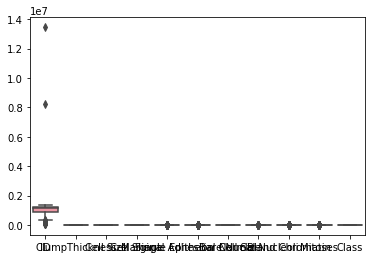

In [236]:
#Treating outlier using boxplot
sns.boxplot(data = bc)

In [237]:
bc["Class"] = bc["Class"].astype("object")
bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                          object
dtype: object

In [238]:
#outlier treatment

# bc['Bare Nuclei'] = bc['Bare Nuclei'].astype('int64')

# bc.dtypes

# q1 = bc.quantile(0.25)

# q3 = bc.quantile(0.75)

# IQR = q3 - q1

# minCap = q1 - (1.5 * IQR)

# maxCap = q3 + (1.5 * IQR)

# # print(minCap,maxCap)

# bc = bc.where((bc>= minCap)&(bc<=maxCap))

# bc.shape

# #drop NaN rows

# bc.dropna(axis = 0, how = 'any',inplace = True)

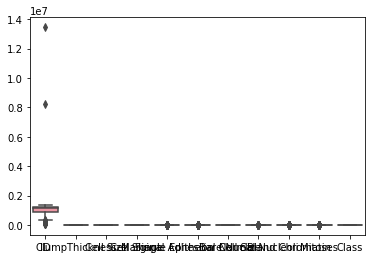

In [239]:
sns.boxplot(data = bc)

### Print and plot the distribution of target variable (Class - using Histogram) 

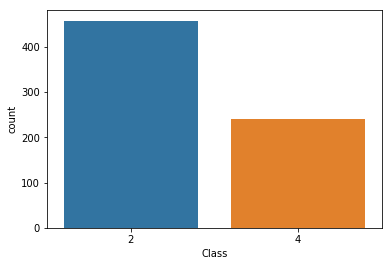

In [240]:
import seaborn as sns
sns.countplot(bc["Class"])

### convert the datatype of Bare Nuclei to `int`

In [241]:
bc["Bare Nuclei"] = bc["Bare Nuclei"].astype("int64")
bc["Bare Nuclei"].dtypes

dtype('int64')

### Standardization of Data (Use Standard Scaler)

In [242]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

print(scaler.fit(bc))

print(scaler.mean_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[1.07170410e+06 4.41773963e+00 3.13447783e+00 3.20743920e+00
 2.80686695e+00 3.21602289e+00 3.48640916e+00 3.43776824e+00
 2.86695279e+00 1.58941345e+00 2.68955651e+00]


C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002190D860>,
      dtype=object)

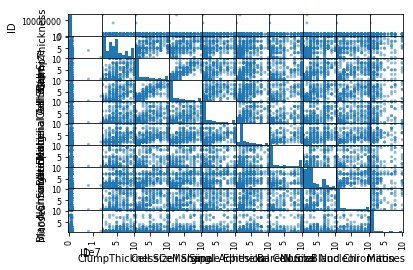

In [243]:
pd.scatter_matrix(bc)

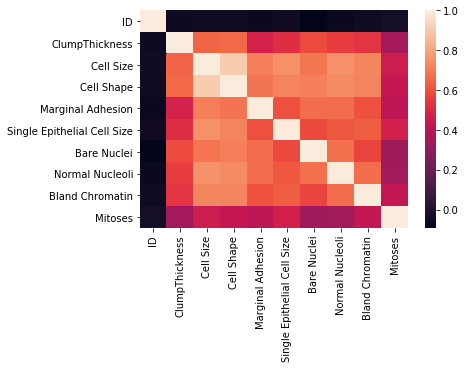

In [244]:
sns.heatmap(data=bc.corr())

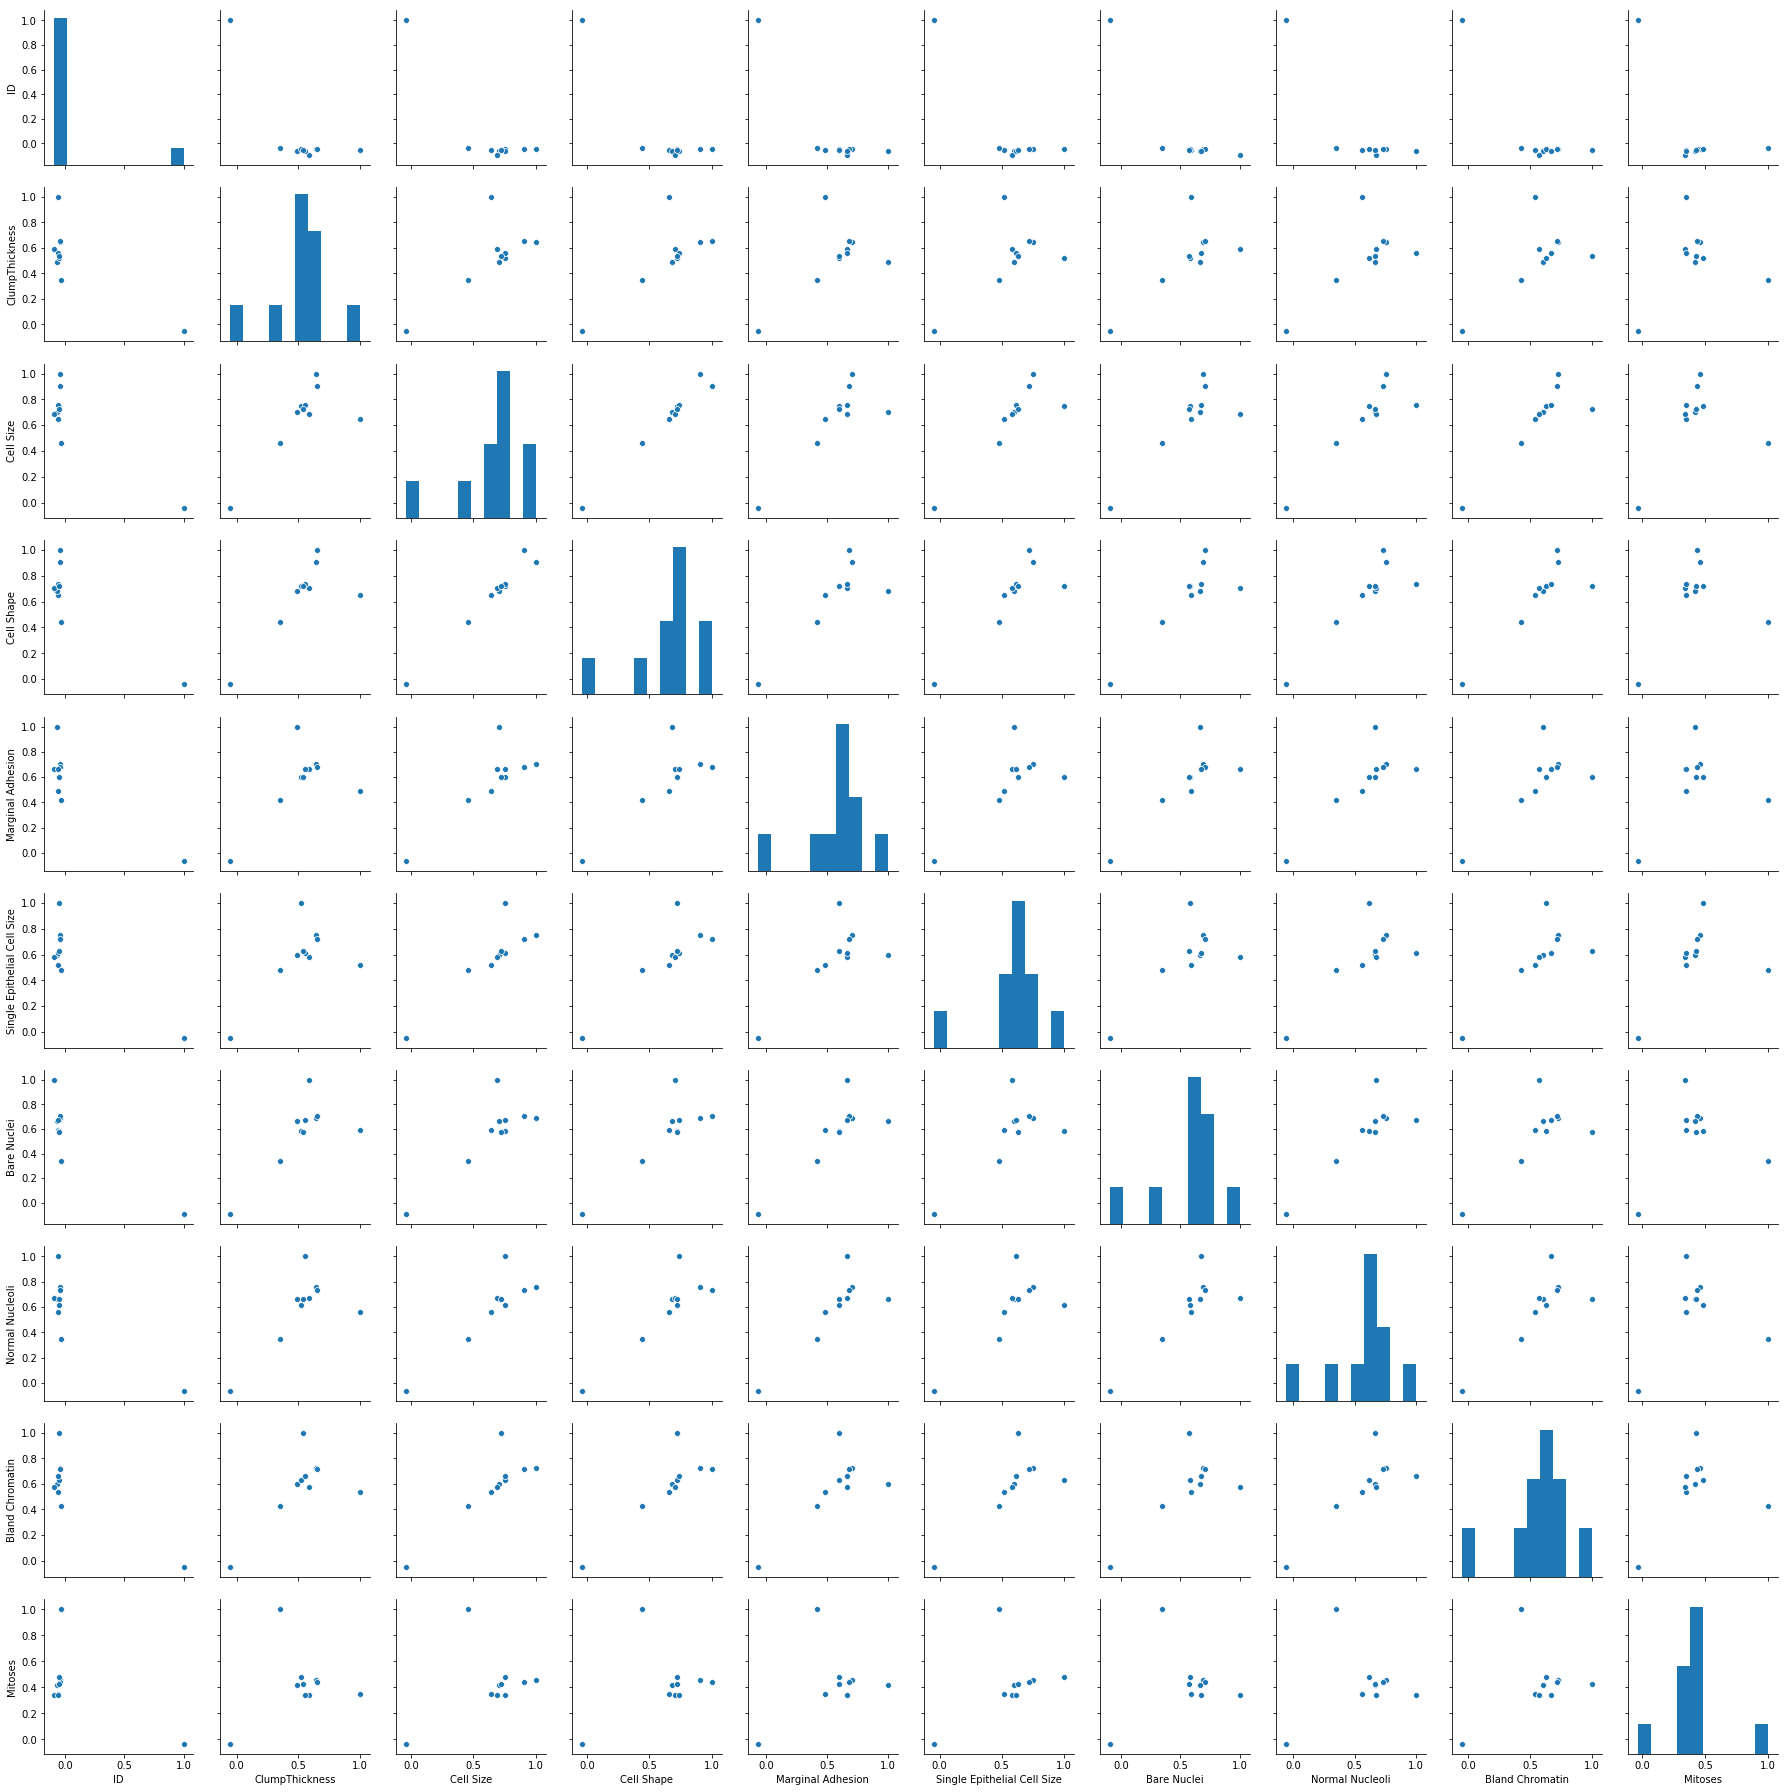

In [245]:
sns.pairplot(data=bc.corr())

### Divide the dataset into feature set and target set

In [250]:
bc_target = bc[["Class"]]
bc_target["Class"]=bc_target["Class"].astype("category")
print(bc_target['Class'].dtype)
bc_feature = bc.drop(columns="Class",axis=1)

category


C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Divide the Training and Test sets in 70:30 

In [251]:
X_train, X_test, y_train, y_test = train_test_split(bc_feature, bc_target, test_size = 0.3, random_state= 40)
print("So train and test has the shape of : ",X_train.shape,X_test.shape,y_train.shape,y_test.shape)

So train and test has the shape of :  (489, 10) (210, 10) (489, 1) (210, 1)


### Model 1 : Implement a default Decision Tree model with no attributes

In [252]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [254]:
print(pd.DataFrame(dt_model.feature_importances_,columns=["Imp"],index = X_train.columns))

                                  Imp
ID                           0.006577
ClumpThickness               0.082691
Cell Size                    0.727299
Cell Shape                   0.035089
Marginal Adhesion            0.015944
Single Epithelial Cell Size  0.000000
Bare Nuclei                  0.100300
Normal Nucleoli              0.017183
Bland Chromatin              0.008938
Mitoses                      0.005979


### Check the training & test accuracy of model 1 

In [255]:
y_predict = dt_model.predict(X_test)
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

1.0
0.9095238095238095


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [257]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini",max_depth=10,max_leaf_nodes=5)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [258]:
y_predict = dt_model.predict(X_test)
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.967280163599182
0.9238095238095239


### Print the confusion matrix of model 1 and model 2

In [259]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))

[[130  11]
 [  5  64]]
